# Read data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('df_clean(0227).csv')
df.head(5)
#df[new_totalprice]=df[Price_PerSquare]*df[Area]

,Unnamed: 0,ID,Longitude,Latitude,Transaction_Time,Transaction_Cycle(day),Followers,Price_PerSquare,Area,BedRoom,...,Building_Year,Renovation,Building_structure,Elevator_Ratio,Elevator,Duty_Free,Subway_or_not,District,Average_Price,Total_Price
0,1282,1283,116.374756,39.928327,2021-12-31,59,14,127400,57.30,2,...,1988,2,2,0.500,1,NaN,1,12,127349,7300020.00
1,1283,1284,116.365760,39.962233,2021-12-31,22,18,117413,62.60,2,...,1987,2,2,0.333,1,NaN,0,12,123801,7350053.80
2,1284,1285,116.408422,39.928622,2021-12-31,64,35,113208,47.70,2,...,1985,2,2,0.333,1,NaN,1,11,122883,5400021.60
3,1285,1286,116.348440,39.920002,2021-12-31,68,89,103721,43.00,1,...,1992,2,2,0.333,1,NaN,1,12,107650,4460003.00
4,1286,1287,116.367766,39.870769,2021-12-31,99,0,86016,49.27,2,...,1981,2,2,0.333,1,NaN,1,12,91137,4238008.32


In [4]:

X = df.drop(['ID','Duty_Free','Transaction_Time','Building_Height','Transaction_Cycle(day)','Followers'], axis=1)

In [5]:
scaler = StandardScaler()
X_processed =  pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [6]:
#  location=X_processed.loc[:,('Longitude','Latitude')]
#  pca1 = PCA(n_components=1)

#  #location_data = pd.Series(pca1.fit_transform(location),index="location")
#  location_data = pd.DataFrame(pca1.fit_transform(location),columns=['location'])


In [7]:
Price_Area=X_processed.loc[:,('Price_PerSquare','Area')]
pca2 = PCA(n_components=1)
#location_data = pd.Series(pca1.fit_transform(location),index="location")
new_price = pd.DataFrame(pca2.fit_transform(Price_Area),columns=['Price_Area'])


In [8]:
support=X_processed.loc[:,('SittingRoom','Elevator','BedRoom','Bathroom')]
pca3 = PCA(n_components=1)
#location_data = pd.Series(pca1.fit_transform(location),index="location")
support = pd.DataFrame(pca3.fit_transform(support),columns=['support'])

In [9]:
#X_processed =pd.concat((pd.DataFrame(X_processed),location_data),axis=1)
X_processed =pd.concat((pd.DataFrame(X_processed),new_price),axis=1)
X_processed =pd.concat((pd.DataFrame(X_processed),support),axis=1)
X_processed=X_processed.loc[:,('Price_Area','support')]
X_processed.to_csv('pcadata.csv')

In [10]:
#X = X_processed.loc[:,('location','Price_Area','support')]
#X = X_processed.loc[:,('Area','Price_PerSquare','Average_Price')]
reduced_data2 = X_processed.loc[:,('Price_Area','support')]

In [11]:
x=reduced_data2.iloc[:,0]
y=reduced_data2.iloc[:,1]

# print(reduced_data2.type)

In [13]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import DBSCAN
# from sklearn.decomposition import PCA

# # Load Dataset
# #iris = load_iris()

# # Declaring Model
# dbscan = DBSCAN()

# # Fitting
# dbscan.fit(X)

# # Transoring Using PCA
# pca_1 = PCA(n_components=2).fit(X)
# pca_2d = pca_1.transform(X)



In [14]:
#pca_2d

In [15]:
# # Plot based on Class
# for i in range(0, pca_2d.shape[0]):
#  if dbscan.labels_[i] == 0:
#   c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
#  elif dbscan.labels_[i] == 1:
#   c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
#  elif dbscan.labels_[i] == -1:
#   c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

# plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
# plt.title('DBSCAN finds 2 clusters and Noise')
# plt.show()


In [12]:
pca6 = PCA(n_components=2)
reduced_data2 = pca6.fit_transform(X)
reduced_data2

array([[ 3816984.82065852,  -144050.925649  ],
       [ 3866939.81188595,  -143713.72040124],
       [ 1916949.31836582,  -151731.61855307],
       ...,
       [-2795125.5291912 ,   146916.47904795],
       [-1855142.40045947,   150805.51633658],
       [-2645160.87801766,   147564.98596239]])

kmeans

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [18]:
kmeans=kmeans.fit(reduced_data2) 

In [19]:
y_ = kmeans.predict(reduced_data2)


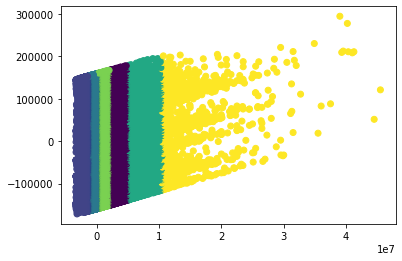

In [22]:
plt.scatter(reduced_data2[:,0],reduced_data2[:,1],c = y_,label=y_) 
#plt.scatter(x,y,c = y_,label=y_) 

In [29]:
y_

array([0, 0, 4, ..., 1, 1, 1])

In [27]:
a = kmeans.labels_.tolist() 




[0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 2,
 4,
 2,
 2,
 2,
 4,
 1,
 2,
 1,
 4,
 0,
 3,
 0,
 4,
 2,
 4,
 4,
 2,
 4,
 2,
 2,
 0,
 0,
 4,
 0,
 0,
 2,
 4,
 2,
 2,
 2,
 2,
 4,
 2,
 0,
 2,
 2,
 4,
 0,
 4,
 4,
 4,
 4,
 2,
 0,
 4,
 3,
 4,
 4,
 0,
 2,
 4,
 2,
 2,
 1,
 4,
 4,
 4,
 2,
 4,
 0,
 0,
 4,
 4,
 2,
 2,
 2,
 2,
 0,
 0,
 4,
 3,
 0,
 4,
 1,
 4,
 2,
 2,
 1,
 3,
 0,
 0,
 2,
 0,
 4,
 0,
 2,
 4,
 2,
 4,
 0,
 0,
 4,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 2,
 4,
 0,
 3,
 0,
 3,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 4,
 0,
 4,
 4,
 0,
 2,
 4,
 0,
 4,
 2,
 1,
 0,
 4,
 4,
 1,
 4,
 4,
 2,
 0,
 4,
 2,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 2,
 2,
 0,
 4,
 2,
 3,
 4,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 4,
 0,
 3,
 2,
 0,
 4,
 2,
 2,
 2,
 4,
 3,
 4,
 4,
 0,
 2,
 2,
 1,
 1,
 0,
 4,
 2,
 2,
 4,
 4,
 2,
 2,
 0,
 1,
 1,
 4,
 0,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 0,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 0,
 2,
 2,
 4,
 2,
 1,
 4,
 4,
 4,
 2,
 4,
 2,
 4,
 2,
 1,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 1,
 2,
 4,
 2,
 0,
 4,
 4,
 2,
 2,
 1,


In [25]:
df_geo = pd.read_csv('df_clean(0227).csv',usecols=['ID','Longitude','Latitude'])

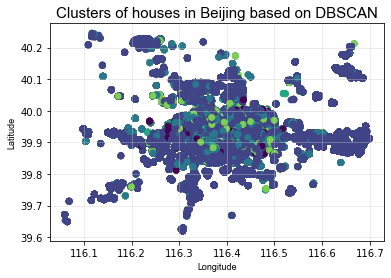

In [26]:
colors = kmeans.labels_
plt.scatter(df_geo['Longitude'],df_geo['Latitude'],c=colors)
plt.xlabel('Longitude',family = 'Arial',fontsize=9)
plt.ylabel('Latitude',family = 'Arial',fontsize=9)
plt.title('Clusters of houses in Beijing based on DBSCAN',family = 'Arial',fontsize=15)
plt.grid(which='major',color='#cccccc',alpha=0.45)
plt.show()

In [30]:
df['label'] = a 
df

,Unnamed: 0,ID,Longitude,Latitude,Transaction_Time,Transaction_Cycle(day),Followers,Price_PerSquare,Area,BedRoom,...,Renovation,Building_structure,Elevator_Ratio,Elevator,Duty_Free,Subway_or_not,District,Average_Price,Total_Price,label
0,1282,1283,116.374756,39.928327,2021-12-31,59,14,127400,57.30,2,...,2,2,0.500,1,NaN,1,12,127349,7300020.00,0
1,1283,1284,116.365760,39.962233,2021-12-31,22,18,117413,62.60,2,...,2,2,0.333,1,NaN,0,12,123801,7350053.80,0
2,1284,1285,116.408422,39.928622,2021-12-31,64,35,113208,47.70,2,...,2,2,0.333,1,NaN,1,11,122883,5400021.60,4
3,1285,1286,116.348440,39.920002,2021-12-31,68,89,103721,43.00,1,...,2,2,0.333,1,NaN,1,12,107650,4460003.00,4
4,1286,1287,116.367766,39.870769,2021-12-31,99,0,86016,49.27,2,...,2,2,0.333,1,NaN,1,12,91137,4238008.32,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314395,318810,318812,116.104825,39.934053,2014-02-23,1,0,13006,66.51,1,...,3,3,0.500,0,NaN,0,1,39492,865029.06,1
314396,318811,318813,116.098391,39.942865,2014-02-20,1,0,13649,101.84,2,...,3,2,0.500,1,NaN,0,1,36923,1390014.16,1
314397,318812,318814,116.104825,39.934053,2014-01-27,1,0,13306,51.86,1,...,3,3,0.125,0,NaN,0,1,39492,690049.16,1
314398,318813,318815,116.104825,39.934053,2014-01-24,1,0,13713,118.87,3,...,3,3,1.000,0,NaN,0,1,39492,1630064.31,1


In [31]:
df.to_csv('5005_addlabel.csv')

